# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of testing examples.
n_test = test['features'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(train['labels']).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

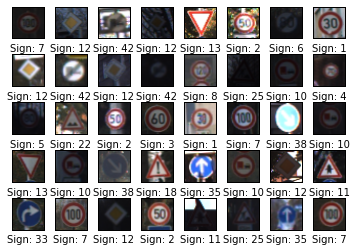

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_images(images, labels):
    assert len(images) == len(labels) == 40
    
    # Create figure with 5x8 sub-plots.
    fig, axes = plt.subplots(5, 8)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i])
        xlabel = "Sign: {0}".format(labels[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
 
index = np.random.choice(n_train, 40)
# Get some random images from the training set
images = train['features'][index,:]

# Get the labels for those images.
labels = train['labels'][index]

# Plot the images and labels using our helper-function above.
plot_images(images, labels)


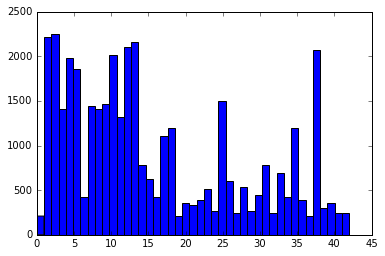

In [4]:
n, bins, patch = plt.hist(train['labels'], bins = n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
import tensorflow as tf

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]*255
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    #a = 0.1
    #b = 0.9
    #grayscale_min = 0
    #grayscale_max = 255
    #return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
    mean = np.mean(image_data)
    std = np.std(image_data)
    return (image_data - mean)/std

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
shear_range =5
ang_range = 15
trans_range = 5
def preprocess(image):
    gimg = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return normalize_grayscale(cv2.equalizeHist(gimg))
    #return normalize_grayscale(clahe.apply(gimg))

def getScaled(image):
    gimg = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #g = cv2.equalizeHist(gimg)
    #rotation
    #num_rows, num_cols = g.shape[:2]
    #ang_rot = np.random.uniform(ang_range)-ang_range/2
    #Rot_M = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),ang_rot,1)    
    # Translation
    #tr_x = trans_range*np.random.uniform()-trans_range/2
    #tr_y = trans_range*np.random.uniform()-trans_range/2
    #Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    #shear
    #pts1 = np.float32([[5,5],[20,5],[5,20]])
    #pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    #pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    #pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    #shear_M = cv2.getAffineTransform(pts1,pts2)
    #transform
    #sg = cv2.warpAffine(g,Rot_M,(num_cols,num_rows))
    #sg = cv2.warpAffine(sg,Trans_M,(num_cols,num_rows))
    #sg = cv2.warpAffine(sg,shear_M,(num_cols,num_rows))

    #return normalize_grayscale(sg)
    h = round(gimg.shape[0]*.8)
    w = round(gimg.shape[1]*0.9)
    sg = gimg[startcol:startcol+h, startrow:startrow+w] 
    sg = cv2.resize(sg, gimg.shape)
    return normalize_grayscale(cv2.equalizeHist(sg))
    
t = []
l = []
startrow = 2
startcol = 2
for i in range(len(train['features'])):
    g = preprocess(train['features'][i])
    t.append(g)
    l.append(train['labels'][i])
    #rotate the image by 15 degree
    num_rows, num_cols = g.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 15, 1)
    t.append(cv2.warpAffine(g, rotation_matrix, (num_cols, num_rows)))
    l.append(train['labels'][i])
    #rotate the image by -15 degree
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), -15, 1)
    t.append(cv2.warpAffine(g, rotation_matrix, (num_cols, num_rows)))
    l.append(train['labels'][i])
    #add scaled verion
    t.append(getScaled(train['features'][i]))
    l.append(train['labels'][i])

gtrain = { 'labels' : l, 'features' : np.array(t)}                                                                                                
# Get randomized datasets for training and validation
from sklearn.cross_validation import train_test_split
train_features, valid_features, train_labels, valid_labels = train_test_split(
    gtrain['features'],
    gtrain['labels'],
    test_size=0.05,
    random_state=832289)
train_feed_dict = { 'features' : train_features, 'labels' : train_labels}
valid_feed_dict = { 'features' : valid_features, 'labels' : valid_labels}



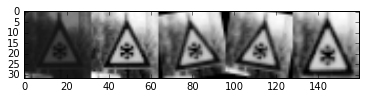

In [6]:
#example effect on image after preprocessing
image = train['features'][31724]
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
equ = cv2.equalizeHist(gray_image)
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#equ = clahe.apply(gray_image)
#rotate
num_rows, num_cols = equ.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 10, 1)
rimg = cv2.warpAffine(equ, rotation_matrix, (num_cols, num_rows))
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), -10, 1)
rnimg = cv2.warpAffine(equ, rotation_matrix, (num_cols, num_rows))
#add scaled version of the image
h = round(gray_image.shape[0]*.8)
w = round(gray_image.shape[1]*0.9)
startrow = 2
startcol = 2
dimag = gray_image[startcol:startcol+h, startrow:startrow+w] 
dimag = cv2.resize(dimag, gray_image.shape)
dimag = cv2.equalizeHist(dimag)
# Shear
#shear_range =10
#pts1 = np.float32([[5,5],[20,5],[5,20]])
#pt1 = 5+shear_range*np.random.uniform()-shear_range/2
#pt2 = 20+shear_range*np.random.uniform()-shear_range/2
#pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
#shear_M = cv2.getAffineTransform(pts1,pts2)
#dimag = cv2.warpAffine(equ,shear_M,(num_cols,num_rows))
res = np.hstack((gray_image,equ, rimg, rnimg, dimag))
plt.imshow(res, cmap ='gray')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
convert the image from RBG to Gray Scale, Igoring the color in the image,  the system has an easier task to learn 
the features, and speed up the process without sacrificing much information.

Then the image goes through equalization to improve the contrast. (see an example above on the effect of 
equalization on the image)

and then the image goes thru a normalization process, to make it center (zero mean), and divided by standard deviation. 
This improves the convergence when searching for optimal solution.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
### Generate data additional data (OPTIONAL!)
by rotating the training image by 15/-15 degree, to generate new training data, to train the system on 
viewing the traffic sign from a different angle (see example above)

Also add scaled version of the original image, by stretching image differently in vertical and horizontal direction 
differently.

### and split the data into training/validation/testing sets here.
split up the training set to 95% training and 5% validation
### Feel free to use as many code cells as needed.

In [7]:
### Define your architecture here.
#use LeNet-Lab configuration as model
# convolution layer 1. the output shape should be 28x28x16
# activation 1
# pooling layer 1, output shape should be 14x14x16
# convolution layer 2, the output shape should be 12x12x32
# activation 2
# pooling layer 2, output shape should be 6x6x32
# flatten layer, flatten the output shape of the final pooling layer such that its 1D instead of 3D.
# fully connected layer 1. this should have 128 outputs
# activation 3
# fully connected layer 2 (logits). This should have 43 outputs
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

EPOCHS = 80
BATCH_SIZE = 128
keep_prob = tf.placeholder(tf.float32) # probability to keep units

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID', name = "conv2d")
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

### Feel free to use as many code cells as needed.

In [8]:
DEPTH = {
    'LAYER1'          : 16,
    'LAYER2'          : 32,
    'DENSE1'          : 128,
}

# Hyperparameters
mu = 0
sigma = 0.1
WEIGHTS = {
    'LAYER1'          : tf.Variable(tf.truncated_normal(shape=(5, 5, 1, DEPTH['LAYER1']), mean = mu, stddev = sigma)),
    'LAYER2'          : tf.Variable(tf.truncated_normal(shape=(3, 3, DEPTH['LAYER1'], DEPTH['LAYER2']), mean = mu, stddev = sigma)),
    'DENSE1'          : tf.Variable(tf.truncated_normal(shape=(1152, DEPTH['DENSE1']), mean = mu, stddev = sigma)),
    'FULLY_CONNECTED' : tf.Variable(tf.truncated_normal(shape=(DEPTH['DENSE1'], n_classes), mean = mu, stddev = sigma)),
}
                                    
def Logits(x):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 32, 32, 1))
    
    # Hyperparameters
    #mu = 0
    #sigma = 0.1
    
    # Convolution Layer 1. Input = 32x32x1. Output = 14x14x16
    with tf.name_scope("conv1"):
        #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, DEPTH['LAYER1']), mean = mu, stddev = sigma), name="weight")
        conv1_W = WEIGHTS['LAYER1']
        conv1_b = tf.Variable(tf.zeros(DEPTH['LAYER1']), name = "bias")
        conv1 = conv2d(x, conv1_W, conv1_b, 1)
        conv1 = maxpool2d(conv1, 2)

    # Convolution Layer 2. Output = 6x6x32.
    with tf.name_scope("conv2"):
        #conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, DEPTH['LAYER1'], DEPTH['LAYER2']), mean = mu, stddev = sigma), name = "weight")
        conv2_W = WEIGHTS['LAYER2']
        conv2_b = tf.Variable(tf.zeros(DEPTH['LAYER2']), name = "bias")
        conv2 = conv2d(conv1, conv2_W, conv2_b, 1)
        conv2 = maxpool2d(conv2, 2)

    # Flatten Layer. 
    with tf.name_scope("flatten"):
        fc1 = flatten(conv2)
        fc1_shape = (fc1.get_shape().as_list()[-1], DEPTH['DENSE1'])
    
        # Fully Connected Layer 1. Input = 6x6x32. Output = 128.
        #fc1_W     = tf.Variable(tf.truncated_normal(shape=(fc1_shape), mean = mu, stddev = sigma), name = "weight")
        fc1_W     = WEIGHTS['DENSE1']
        fc1_b     = tf.Variable(tf.zeros(DEPTH['DENSE1']), name = "bias")
        fc1       = tf.matmul(fc1, fc1_W) + fc1_b
        fc1       = tf.nn.relu(fc1)
        #add dropout
        fc1       = tf.nn.dropout(fc1, keep_prob)

    # Fully Connected Layer 2. Input = 128. Output = n_classes
    with tf.name_scope("fully_connected"):
        #fc3_W  = tf.Variable(tf.truncated_normal(shape=(DEPTH['DENSE2'], n_classes), mean = mu, stddev = sigma), name = "weight")
        fc2_W  = WEIGHTS['FULLY_CONNECTED']
        fc2_b  = tf.Variable(tf.zeros(n_classes), name ="bias")
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
follow LeNet-Lab configuration
convolution layer 1. the output shape should be 28x28x16
activation 1
pooling layer 1, output shape should be 14x14x16
convolution layer 2, the output shape should be 12x12x32
activation 2
pooling layer 2, output shape should be 6x6x32
flatten layer, flatten the output shape of the final pooling layer such that its 1D instead of 3D.
fully connected layer 1. this should have 128 outputs
activation 3
fully connected layer 2 (logits). This should have 43 outputs

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = Logits(x)
regularizers = tf.nn.l2_loss(WEIGHTS['LAYER1']) + tf.nn.l2_loss(WEIGHTS['LAYER2']) \
                + tf.nn.l2_loss(WEIGHTS['DENSE1']) + tf.nn.l2_loss(WEIGHTS['FULLY_CONNECTED'])
loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.AdamOptimizer(0.001)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(features, labels):
    num_examples = len(features)
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = features[offset:offset+BATCH_SIZE], labels[offset:offset+BATCH_SIZE]
        loss, accuracy =  sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * batch_x.shape[0])
        total_loss     += (loss * batch_x.shape[0])
    return total_loss / num_examples, total_accuracy / num_examples

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    best_validation_loss = np.inf
    validationSummary = []
    trainingSummary = []
    for i in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        total_training_loss = 0
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_features[offset:end], train_labels[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            total_training_loss += (loss * batch_x.shape[0])

        validation_loss, validation_accuracy = evaluate(valid_features, valid_labels)
        trainingSummary.append(total_training_loss/n_train)
        if i%5 == 0:
            print("EPOCH {0}: Validation Loss = {1:.3f}, Validation Accuracy = {2:.3f}, Training Loss = {3:.3f}".format(i+1, 
                                validation_loss, validation_accuracy, (total_training_loss/n_train)))
        validationSummary.append(validation_loss)
        #early stopping
        if validation_loss < best_validation_loss:
            best_validation_loss = validation_loss
            try:
                saver
            except NameError:
                saver = tf.train.Saver()
            saver.save(sess, './traffic')
     
    print('done training')
    #try:
        #saver
    #except NameError:
        #saver = tf.train.Saver()
    #saver.save(sess, './traffic')
    #print("Model saved")
    #plot training vs validation loss
    print ('best_validation_loss', best_validation_loss)
    plt.plot(trainingSummary, 'b', label='Training loss')
    plt.plot(validationSummary, 'r', label = 'validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


In [ ]:
instead of using momentum etc to adjust the learning rate, i am using AdamOptimizer, 
which takes care of dynamically adjust the learning rate.

the following hyperparameters are used
initial learning rate = 0.001
stochastic gradient descent with batch size = 128
dropout probability = 0.5
using maxpooling
2 convolution layer, one with 5x5 filter and 16 features, the other one is 3x3 filter with 32 features.

i am running with 80 epochs, but it will only use the parameter if the validation loss is improving.
The model also incorporate maxpooling and dropout. Using dropout together with L2 regularization does not seems
to provide added benefit, so the model only use dropout.



Question 5

What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem.


the implementation follows the LeNet-lab model. Then i essentially doing trial and error, using various configuration, like
adding extra convolution layer, fully connected layer, different number of features map until the loss rate didn't change much.

Also i tried different drop out rate, filter size.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
index = np.random.choice(n_test, 40)
# Get some random images from the training set
images = test['features'][index,:]

# Get the labels for those images.
labels = test['labels'][index]

# Plot the images and labels using our helper-function above.
plot_images(images, labels)

In [ ]:
t = []
for img in test['features']:
    g = preprocess(img)
    t.append(g)
test_feed_dict = { 'labels' : test['labels'], 'features' : np.array(t)}

n, bins, patch = plt.hist(test['labels'], bins = n_classes)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
imagemap = {}
for i in range(n_test):
    if test['labels'][i] not in imagemap:
        imagemap[test['labels'][i]]  = i
    if len(imagemap) == n_classes:
        break
    
# Create figure with 5x9 sub-plots.
fig, axes = plt.subplots(5, 9)
#fig.subplots_adjust(hspace=1.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    if i >= n_classes:
        ax.set_xticks([])
        ax.set_yticks([])
        continue
        
    # Plot image.
    ax.imshow(test['features'][imagemap[i]])
    xlabel = "{0}".format(i+1)

    ax.set_xlabel(xlabel)
        
    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])   

In [ ]:
#plot grayscale image for each class
fig, axes = plt.subplots(5, 9)
imagelist = []
for i, ax in enumerate(axes.flat):
    if i >= n_classes:
        ax.set_xticks([])
        ax.set_yticks([])
        continue
        
    #plot image
    image = cv2.cvtColor(test['features'][imagemap[i]], cv2.COLOR_RGB2GRAY)
    image = cv2.equalizeHist(image)
    imagelist.append(image)

    ax.imshow(image, cmap = 'gray')
    xlabel = '{0}'.format(i+1)
    ax.set_xlabel(xlabel)
    
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
#show 5 samples after converting to grayscale
ilist = [4, 5, 6, 9, 41,]
fig, axes = plt.subplots(1,5)
for i, ax in enumerate(axes.flat):
    ax.imshow(imagelist[ilist[i]], cmap = 'gray')
    ax.set_xlabel('{0}'.format(ilist[i]))
    ax.set_xticks([])
    ax.set_yticks([])
#the above image, due to contrast, brightness , sun shade and some of them are blur.
#make it kind of difficult to classify properly

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#the following runs the loss and accuracy over the entire test set
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('traffic.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    test_loss, test_accuracy = evaluate(test_feed_dict['features'], test_feed_dict['labels'])
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.